In [1]:
import pandas as pd
import numpy as np
import nsepy 
import os
from datetime import datetime ,date,timedelta
import datetime
from dateutil.relativedelta import *
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 1000)
%matplotlib inline

In [2]:
start_date = datetime.date(2017, 1, 1)
end_date = datetime.date(2021, 4, 30)
symbol = 'NIFTY'

In [3]:
    def getMonthlyExpirtyDate():
        local_start_date = start_date
        monthly_expirty_Date  =[]
        #start_date = datetime.date(2021, 1, 1)
        #end_date = datetime.date(2021, 4, 30)
        #delta = datetime.timedelta(days=1)
        delta = relativedelta(months=+1)
        while local_start_date <= end_date:
            #print(start_date.year,start_date.month)
            #print(str(max(nsepy.get_expiry_date(start_date.year,start_date.month))))

            monthly_expirty_Date.append(str(max(nsepy.get_expiry_date(local_start_date.year,local_start_date.month))))
            local_start_date += delta
        return monthly_expirty_Date
    
    def checkfirstTradyingDayofMonth(first_day_of_the_month,expiry_day):
        for i in range(1,6):

            nifty_fut = nsepy.get_history(symbol=symbol,
                                        start=first_day_of_the_month,
                                        end=first_day_of_the_month,
                                        index=True,
                                        futures=True,
                                        expiry_date=expiry_day)
            if not nifty_fut.empty :
                                          
                return first_day_of_the_month
            else:
                #print(first_day_of_the_month)
                #print(type(first_day_of_the_month))
                first_day_of_the_month = (first_day_of_the_month+timedelta(days =1))
                #print("After",first_day_of_the_month)
                #print(type(first_day_of_the_month))

    def getMonthlyExpirtyFromBahvcopy():
        database = "C:/Users/sanjo/PycharmProjects/mokshtech/stock_predictor/database/optionData"
        print(os.getcwd())
        print(os.listdir())
        local_start_date = start_date
        banknifty = pd.DataFrame()  
        monthly_expirty_Date  =[]
        delta = relativedelta(years=+1)
        
        try:
            while local_start_date <= end_date:
                val =0
                #print(str(symbol)+str(local_start_date.year)+".csv")
                filename = str(symbol)+str(local_start_date.year)+".csv"
                fname = os.path.join(database,filename)
                fname_day = os.path.join(database,filename)
                df = pd.read_csv(fname)
                df = df.loc[df['SYMBOL']== symbol]
                df['EXPIRY_DT'] = pd.to_datetime(df['EXPIRY_DT']).dt.date
                
                df = df[df['EXPIRY_DT'] < end_date]
                df['EXPIRY_DT'] = pd.to_datetime(df['EXPIRY_DT']).dt.strftime('%Y-%m-%d')
                df['EXPIRY_DT_Year_month'] = pd.to_datetime(df['EXPIRY_DT']).dt.strftime('%Y-%m')
                
                df1 = df[['EXPIRY_DT','EXPIRY_DT_Year_month']]
                
                banknifty= banknifty.append(df1)        
                local_start_date += delta  
        except Exception as error:
            print("File not found {0}".format(error)) 
        banknifty.sort_values("EXPIRY_DT", inplace = True)
        banknifty.drop_duplicates(inplace = True)   
        #for name , group in banknifty.groupby('EXPIRY_DT_Year_month'):
        #print(type(sorted(list(banknifty.groupby('EXPIRY_DT_Year_month').tail(1).EXPIRY_DT))))
        
        option_expiry_date_list = sorted(list(banknifty.groupby('EXPIRY_DT_Year_month').tail(1).EXPIRY_DT))
        #option_expiry_date_list =list(zip(*map(banknifty.get, ['EXPIRY_DT_Year_month','EXPIRY_DT'])))
        #print("option_expiry_date_list",option_expiry_date_list)
      
        return option_expiry_date_list

In [4]:


expiry_list = getMonthlyExpirtyFromBahvcopy()


C:\Users\sanjo\PycharmProjects\mokshtech\stock_predictor\optionvaluecalculation\strategies
['.ipynb_checkpoints', 'df.csv', 'forwordvolatility.py', 'input.csv', 'monthlyoptionbuying.ipynb', 'monthy_nifty_option_buy_Bhavcopy_Pandl.csv', 'monthy_nifty_option_buy_nsepy_Pandl.csv', 'NIFTY.csv', 'preDefinedStrategies', 'straddle.py', 'strategies.py', 'weeklyOptionBuy.ipynb', 'weeklyOptionBuy_Selladditon.ipynb', 'weekly_banknifty_option_buy_Pandl.csv', 'weekly_nifty_option_buy_Pandl.csv', '__init__.py']


In [17]:
    def monthlyOptionBuyusingBhavCopy():
        database = "C:/Users/sanjo/PycharmProjects/mokshtech/stock_predictor/database/optionData"
        print(os.getcwd())
        print(os.listdir())
        local_start_date = start_date
        banknifty = pd.DataFrame()
        formatted_banknifyt_df = pd.DataFrame(['Year_month','P&L'])
        month_profit_loss = pd.DataFrame()
      
        delta = relativedelta(years=+1)
        #monthly_expirty_date = getMonthlyExpirtyDate()
        monthly_expirty_date = expiry_list
        year_month_list =[]
        p_N_L_list =[]
        cum_p_N_L_list =[]
        slipage = 5
        P_N_L_dic =  {}

        try:
            while local_start_date <= end_date:
                val =0
                print(str(symbol)+str(local_start_date.year)+".csv")
                filename = str(symbol)+str(local_start_date.year)+".csv"
                fname = os.path.join(database,filename)
                fname_day = os.path.join(database,filename)
                df = pd.read_csv(fname)
                df = df.loc[df['SYMBOL']== symbol]
                df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')
                df['Year_month'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m')
                df['EXPIRY_DT'] = pd.to_datetime(df['EXPIRY_DT']).dt.strftime('%Y-%m-%d')
                df['EXPIRY_DT_Year_month'] = pd.to_datetime(df['EXPIRY_DT']).dt.strftime('%Y-%m')
                formatted_banknifyt_df = df[ df['Year_month'] == df['EXPIRY_DT_Year_month'] ]
                #print(formatted_banknifyt_df)
                # below row is to get only montly expirty date colums from data frame
                formatted_banknifyt_df= formatted_banknifyt_df[ formatted_banknifyt_df['EXPIRY_DT'].isin(monthly_expirty_date)]
                formated_option_df_group = formatted_banknifyt_df.groupby('Year_month')

                for name , group in formated_option_df_group :
                    #print(name)
                    future_logic_df = group[group['INSTRUMENT']=='FUTIDX']
                    future_logic_df = future_logic_df.iloc[[0]]
                    strike_price = (future_logic_df['OPEN']- (future_logic_df['OPEN'])%100).astype(int).min()
                    #print("Strile price is ",strike_price)
                    option_df = group[group['INSTRUMENT']=='OPTIDX']
                    option_df = option_df[option_df['STRIKE_PR']==strike_price]
                    month_option_df_ce = option_df[option_df['OPTION_TYP'].isin(['CE'])]
                    month_option_df_pe = option_df[option_df['OPTION_TYP'].isin(['PE'] )]                                                              
                    month_option_df_ce = month_option_df_ce.iloc[[0,-1]]
                    month_option_df_pe = month_option_df_pe.iloc[[0,-1]]
                    month_option_df_ce_buy = month_option_df_ce.iloc[[0]]['OPEN'].min()
                    month_option_df_ce_sell =month_option_df_ce.iloc[[-1]]['CLOSE'].min()
                    month_option_df_pe_buy = month_option_df_pe.iloc[[0]]['OPEN'].min()
                    month_option_df_pe_sell =month_option_df_pe.iloc[[-1]]['CLOSE'].min()
                    #print(month_option_df_ce_sell,month_option_df_ce_buy,month_option_df_pe_sell,month_option_df_pe_buy)
                    pandl = (month_option_df_ce_sell-month_option_df_ce_buy)+ (month_option_df_pe_sell-month_option_df_pe_buy)
                    #print("pandl",pandl,abs(pandl*slipage/100))
                    pandl = pandl - abs(pandl*slipage/100)
                    #print("pandl",pandl)
                    if cum_p_N_L_list:
                        #print("inlistelse ",val)
                        val = cum_p_N_L_list[-1]        

                    p_N_L_list.append(pandl)
                    cum_p_N_L_list.append(val+pandl)   
                    year_month_list.append(name)
                    P_N_L_dic.update({name :[name,name,strike_price,month_option_df_ce_buy
                                               ,month_option_df_pe_buy,month_option_df_ce_sell,month_option_df_pe_sell,
                                                month_option_df_ce_sell-month_option_df_ce_buy,
                                                month_option_df_pe_sell-month_option_df_pe_buy,pandl,val+pandl]})

                banknifty= banknifty.append(formatted_banknifyt_df)
                #print("r",fname)

                local_start_date += delta

            #print(year_month_list)
            #print(p_N_L_list)
            #print(cum_p_N_L_list)
            month_profit_loss = pd.DataFrame(P_N_L_dic)
            month_profit_loss = month_profit_loss.transpose()
            month_profit_loss.columns =['Buy_date','Sell_Date','Strike_price','Call__buy_price','Put_buy_price','Call_sell_price',
                                   'Put_sell_price','Call_PandL','Put_PandL','Total_PandL','Cum_PandL']
            
        except Exception as error:
            print("File not found {0}".format(error))
        print(month_profit_loss)
        return month_profit_loss


C:\Users\sanjo\PycharmProjects\mokshtech\stock_predictor\optionvaluecalculation\strategies
['.ipynb_checkpoints', 'df.csv', 'forwordvolatility.py', 'input.csv', 'monthlyoptionbuying.ipynb', 'monthy_nifty_option_buy_Bhavcopy_Pandl.csv', 'monthy_nifty_option_buy_nsepy_Pandl.csv', 'NIFTY.csv', 'preDefinedStrategies', 'straddle.py', 'strategies.py', 'weeklyOptionBuy.ipynb', 'weeklyOptionBuy_Selladditon.ipynb', 'weekly_banknifty_option_buy_Pandl.csv', 'weekly_nifty_option_buy_Pandl.csv', '__init__.py']
NIFTY2017.csv
NIFTY2018.csv
NIFTY2019.csv
NIFTY2020.csv
NIFTY2021.csv
        Buy_date Sell_Date Strike_price Call__buy_price Put_buy_price Call_sell_price Put_sell_price Call_PandL Put_PandL Total_PandL  Cum_PandL
2017-01  2017-01   2017-01         8200           114.0        114.25          395.25           0.05     281.25    -114.2    158.6975   158.6975
2017-02  2017-02   2017-02         8600          141.95         137.8           339.8           0.05     197.85   -137.75      57.095   2

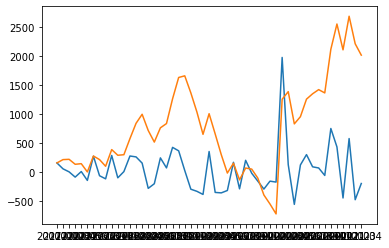

In [18]:
    month_profit_loss = monthlyOptionBuyusingBhavCopy()
    plt.plot(month_profit_loss['Buy_date'], month_profit_loss['Total_PandL'],month_profit_loss['Cum_PandL'])
    plt.show()
    month_profit_loss.to_csv("monthy_nifty_option_buy_Bhavcopy_Pandl.csv")


In [15]:
    def monthlyOptionBuyusingNsePy():
        print(os.getcwd())
        print(os.listdir())

        banknifty = pd.DataFrame()
        formatted_banknifyt_df = pd.DataFrame(['Year_month','P&L'])
        month_profit_loss = pd.DataFrame()

        delta = relativedelta(years=+1)
        #monthly_expirty_date =getMonthlyExpirtyFromBahvcopy()
        #monthly_expirty_date = getMonthlyExpirtyDate()
        #print("monthly_expirty_date",monthly_expirty_date)
        year_month_list =[]
        p_N_L_list =[]
        cum_p_N_L_list =[]
        slipage = 5
        P_N_L_dic =  {}
        # code using nsepy to make sure its bhavcopy is giving matching result

        banknifty = pd.DataFrame()
        
        for current_expiry_date in  expiry_list:
            try:
                val =0
                expiry_day = datetime.datetime.strptime(current_expiry_date,'%Y-%m-%d')
                #print(expiry_day)
                first_day_of_the_month = expiry_day.replace(day=1)
                first_day_of_the_month =checkfirstTradyingDayofMonth(first_day_of_the_month,expiry_day)
                #print(first_day_of_the_month)
                nifty_fut = nsepy.get_history(symbol=symbol,
                                    start=first_day_of_the_month,
                                    end=first_day_of_the_month,
                                    index=True,
                                    futures=True,
                                    expiry_date=expiry_day)
                strike_price = (nifty_fut['Open']- (nifty_fut['Open'])%100).astype(float).min()
                #print(strike_price)

                buy_opt_ce = nsepy.get_history(symbol=symbol,
                                    start=first_day_of_the_month,
                                    end=first_day_of_the_month,
                                    index=True,
                                    option_type='CE',
                                    strike_price=strike_price,
                                    expiry_date=expiry_day)

                buy_opt_pe = nsepy.get_history(symbol=symbol,
                                    start=first_day_of_the_month,
                                    end=first_day_of_the_month,
                                    index=True,
                                    option_type='PE',
                                    strike_price=strike_price,
                                    expiry_date=expiry_day)
                sell_opt_ce = nsepy.get_history(symbol=symbol,
                                    start=expiry_day,
                                    end=expiry_day,
                                    index=True,
                                    option_type='CE',
                                    strike_price=strike_price,
                                    expiry_date=expiry_day)

                sell_opt_pe = nsepy.get_history(symbol=symbol,
                                    start=expiry_day,
                                    end=expiry_day,
                                    index=True,
                                    option_type='PE',
                                    strike_price=strike_price,
                                    expiry_date=expiry_day)

                month_option_df_ce_buy = buy_opt_ce.iloc[[0]]['Open'].min()
                month_option_df_ce_sell =sell_opt_ce.iloc[[0]]['Close'].min()
                month_option_df_pe_buy = buy_opt_pe.iloc[[0]]['Open'].min()
                month_option_df_pe_sell =sell_opt_pe.iloc[[0]]['Close'].min()

                #print(month_option_df_ce_sell,month_option_df_ce_buy,month_option_df_pe_sell,month_option_df_pe_buy)
                pandl = (month_option_df_ce_sell-month_option_df_ce_buy)+ (month_option_df_pe_sell-month_option_df_pe_buy)
                #print("pandl",pandl,abs(pandl*slipage/100))
                pandl = pandl - abs(pandl*slipage/100)
                #print("pandl",pandl)
                if cum_p_N_L_list:
                        print("inlistelse ",val)
                        val = cum_p_N_L_list[-1]        

                p_N_L_list.append(pandl)
                cum_p_N_L_list.append(val+pandl)   
                year_month_list.append(expiry_day)
                P_N_L_dic.update({expiry_day :[first_day_of_the_month,expiry_day,strike_price,month_option_df_ce_buy
                                               ,month_option_df_pe_buy,month_option_df_ce_sell,month_option_df_pe_sell,
                                                month_option_df_ce_sell-month_option_df_ce_buy,
                                                month_option_df_pe_sell-month_option_df_pe_buy,pandl,val+pandl]})


            except Exception as error:
                print("File not found {0}".format(error))
        #print(p_N_L_list)
        #print(cum_p_N_L_list)
        month_profit_loss = pd.DataFrame(P_N_L_dic)
        month_profit_loss = month_profit_loss.transpose()
        month_profit_loss.columns =['Buy_date','Sell_Date','Strike_price','Call__buy_price','Put_buy_price','Call_sell_price',
                                   'Put_sell_price','Call_PandL','Put_PandL','Total_PandL','Cum_PandL']
        print(month_profit_loss)
        return month_profit_loss



C:\Users\sanjo\PycharmProjects\mokshtech\stock_predictor\optionvaluecalculation\strategies
['.ipynb_checkpoints', 'df.csv', 'forwordvolatility.py', 'input.csv', 'monthlyoptionbuying.ipynb', 'monthy_nifty_option_buy_Bhavcopy_Pandl.csv', 'monthy_nifty_option_buy_nsepy_Pandl.csv', 'NIFTY.csv', 'preDefinedStrategies', 'straddle.py', 'strategies.py', 'weeklyOptionBuy.ipynb', 'weeklyOptionBuy_Selladditon.ipynb', 'weekly_banknifty_option_buy_Pandl.csv', 'weekly_nifty_option_buy_Pandl.csv', '__init__.py']
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
File not found unsupported operand type(s) for -: 'NoneType' and 'NoneType'
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
i

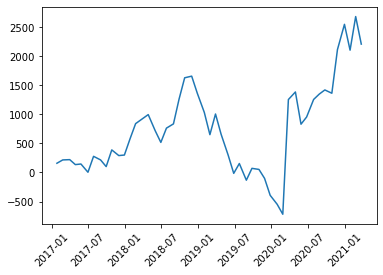

In [16]:

    month_profit_loss =monthlyOptionBuyusingNsePy()
    plt.xticks(rotation=45)

    plt.plot(month_profit_loss['Sell_Date'], month_profit_loss['Cum_PandL'])
    plt.show()
    month_profit_loss.to_csv("monthy_nifty_option_buy_nsepy_Pandl.csv")


NIFTY2021.csv
Strile price is  14000
0.2 310.0 186.4 299.75
pandl -423.15 21.1575
pandl -444.3075
Strile price is  13700
1400.35 461.65 0.1 330.25
pandl 608.55 30.4275
pandl 578.1225
inlistelse  0
Strile price is  14700
0.15 388.5 358.9 422.2
pandl -451.65000000000003 22.5825
pandl -474.2325
inlistelse  -444.3075
Strile price is  14800
140.3 335.7 292.05 282.7
pandl -186.04999999999995 9.302499999999998
pandl -195.35249999999996
inlistelse  133.81499999999994
r C:/Users/sanjo/PycharmProjects/mokshtech/stock_predictor/database/optionData\NIFTY2021.csv
[-444.3075, 578.1225, -474.2325, -195.35249999999996]
[-444.3075, 133.81499999999994, -340.4175000000001, -535.77]

2021-01-28 00:00:00
2021-01-01 00:00:00
14000.0
0.2 310.0 186.4 299.75
pandl -444.3075
2021-02-25 00:00:00
2021-02-01 00:00:00
13700.0
1400.35 461.65 0.1 330.25
pandl 578.1225
inlistelse  0
2021-03-25 00:00:00
2021-03-01 00:00:00
14700.0
0.15 388.5 358.9 422.2
pandl -474.2325
inlistelse  0
2021-04-29 00:00:00
2021-04-01 00:00:00
14800.0
File not found positional indexers are out-of-bounds
[-444.3075, 578.1225, -474.2325]
[-444.3075, 133.81499999999994, -340.4175000000001]
